In [1]:
#Import of packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 10) 
pd.set_option('display.max_rows', 50) 
df=pd.read_csv("worldhappiness2019.csv")

#read in region csv
regiondata=pd.read_csv("region.csv")
regiondata


,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia
...,...,...,...
250,Western Sahara,Africa,Northern Africa
251,Yemen,Asia,Western Asia
252,Zambia,Africa,Sub-Saharan Africa
253,Zimbabwe,Africa,Sub-Saharan Africa


In [0]:
#sql join of region csv on country name in worldhappiness2019
mergedata=pd.merge(df, regiondata, how='left', left_on='Country or region', right_on='name')
# Checking for missing values 
mergedata.loc[pd.isnull(mergedata).iloc[:,9]].to_csv("missing.csv",index=False)


In [3]:
# clean up final csv data
df=mergedata.drop(['name'],axis=1)
df=df.drop(['Country or region'],axis=1)
df=df.drop(['sub-region'],axis=1)

df

,Happiness_level,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
0,Very High,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,Very High,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,Very High,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,Very High,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,Very High,1.396,1.522,0.999,0.557,0.322,0.298,Europe
...,...,...,...,...,...,...,...,...
151,Very Low,0.359,0.711,0.614,0.555,0.217,0.411,Africa
152,Very Low,0.476,0.885,0.499,0.417,0.276,0.147,Africa
153,Very Low,0.350,0.517,0.361,0.000,0.158,0.025,Asia
154,Very Low,0.026,0.000,0.105,0.225,0.235,0.035,Africa


# Explore bivariate results (Use visualizations!)
# Describe any relationships you see between particular features and the target variable 

In [4]:
#For the purpose of visualization, I'm going to turn the target happiness level variable into a ordinal categorical variable
#Looking at the categorical values for hapiness_level
pd.crosstab(index=df['Happiness_level'],columns='count')

col_0,count
Happiness_level,
Average,31
High,32
Low,31
Very High,31
Very Low,31


In [0]:
#For the purpose of visualization, I'm going to turn the target happiness_level variable into a ordinal categorical variable
#This code turns the feature into a Likert Scale dummy variable
df
conditions = [
  (df['Happiness_level'] == 'Very High'),
  (df['Happiness_level'] == 'High'),
  (df['Happiness_level'] == 'Average'),
  (df['Happiness_level'] == 'Low'),
  (df['Happiness_level'] == 'Very Low')]
choices = [5,4,3,2,1]
df['Happiness_level'] = np.select(conditions, choices, default=np.nan)

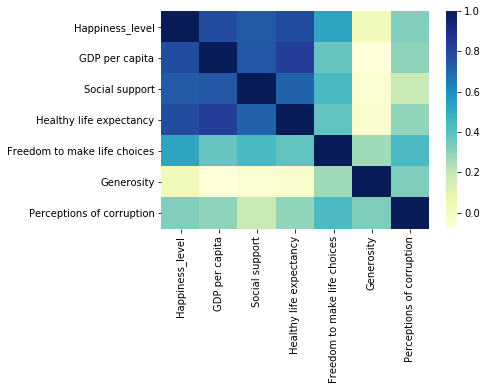

In [7]:
#creates a correlational heatmap based on the bivariate relationship of features
sns.heatmap(df.corr(),robust=True,cmap="YlGnBu")

***Answer*** *Looking at the correlational heatmap, it would seem that a few features are highly correlated with each other as well as the target feature of happiness_level. It would seem that GDP per capita, Social Support, and Health Life Expectancy all vary together as well as with happines level*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


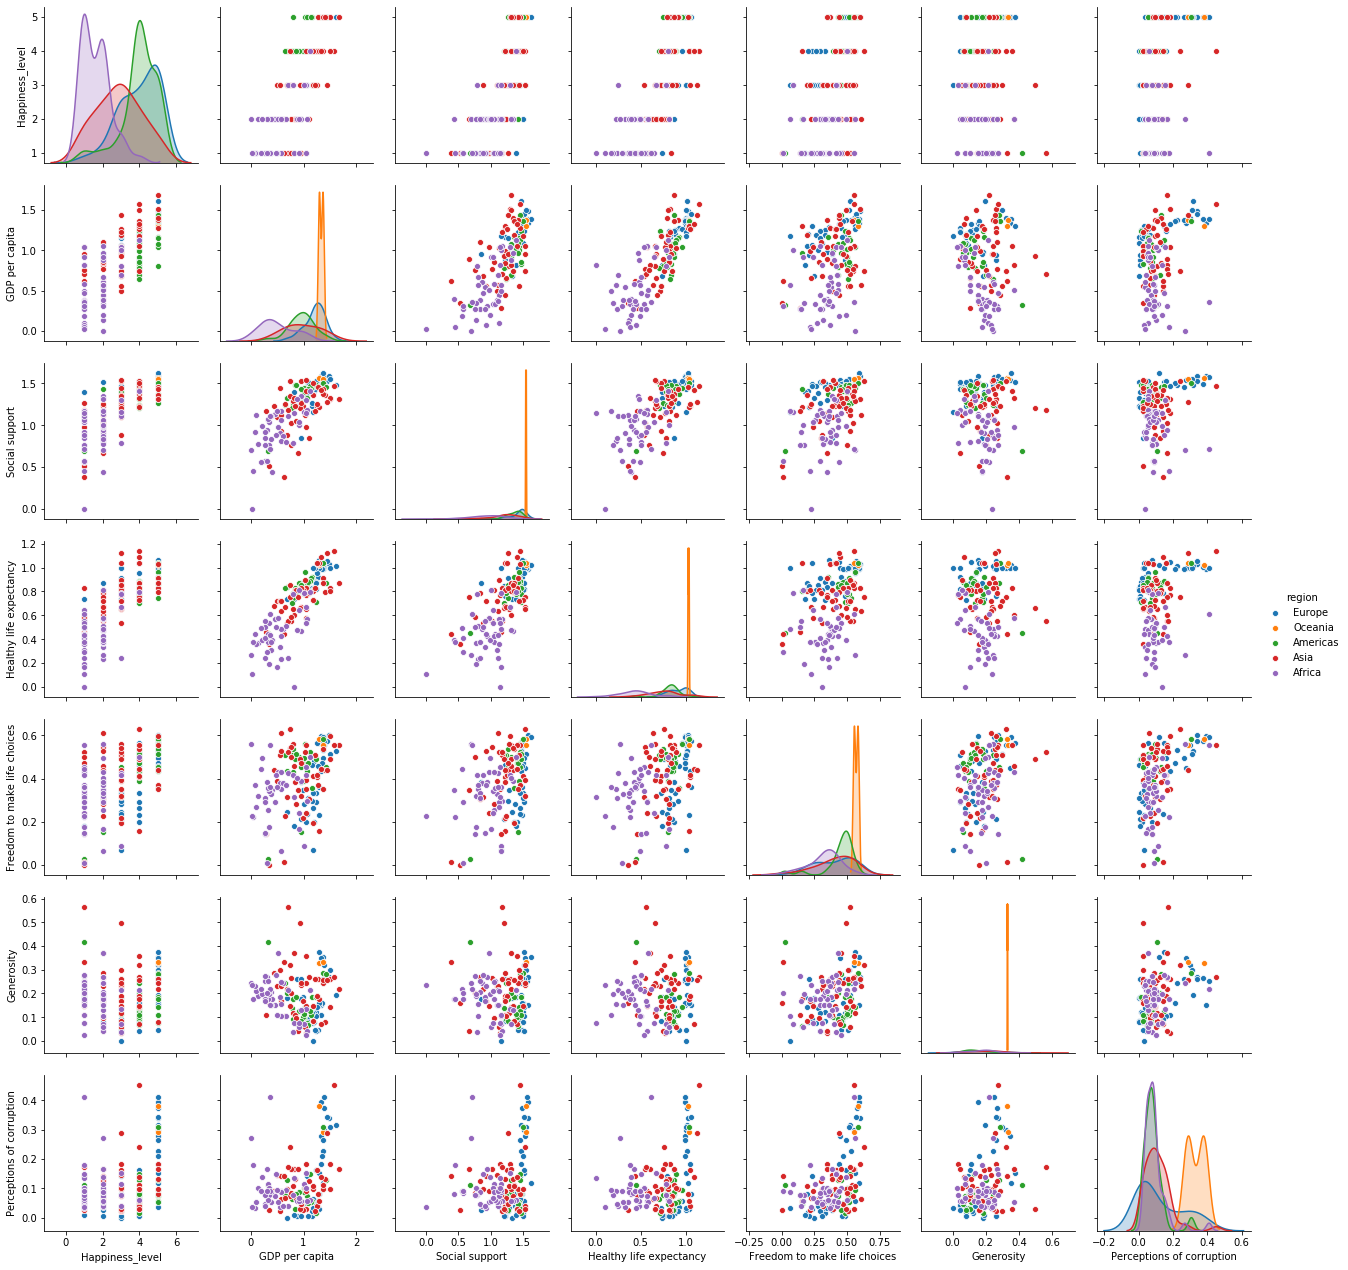

In [8]:
#Creates a series of bivariate distruptions diveded by region
sns.pairplot(df, hue='region')

***Answer** Looking at the target variable of happiness, regional differences are quite large. With America and Europe being the most happy, Asia varying widely, and with Africa being considered mostly unhappy. Looking at the relationship with all of the features and happiness_level, georosity doesn't have a strong trend, with almost all countries following between the range of .3 to .1. So, genorosity does not seem to have an effect on happiness. THe strongest predictive variables seem to be GDP per capita, as it has a strong positive trend with happiness level. Also, it seems like falling between 1.0 to 1.5 gdp per capita is key to a high happiness level.

#Examine features that predict happiness categories using one or more models that allow for automatic feature selection
#Explain any meaningful findings

In [11]:
#Reloading dataset because colab was being weird
#It's just a copy and paste of above code
df=pd.read_csv("worldhappiness2019.csv")
regiondata=pd.read_csv("region.csv")
mergedata=pd.merge(df, regiondata, how='left', left_on='Country or region', right_on='name')
df=mergedata.drop(['name'],axis=1)
df=df.drop(['Country or region'],axis=1)
df=df.drop(['sub-region'],axis=1)
df

,Happiness_level,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
0,Very High,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,Very High,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,Very High,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,Very High,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,Very High,1.396,1.522,0.999,0.557,0.322,0.298,Europe
...,...,...,...,...,...,...,...,...
151,Very Low,0.359,0.711,0.614,0.555,0.217,0.411,Africa
152,Very Low,0.476,0.885,0.499,0.417,0.276,0.147,Africa
153,Very Low,0.350,0.517,0.361,0.000,0.158,0.025,Asia
154,Very Low,0.026,0.000,0.105,0.225,0.235,0.035,Africa


In [12]:
#crosstab of all regions
pd.crosstab(index=df['region'],columns='count')

col_0,count
region,
Africa,45
Americas,23
Asia,46
Europe,40
Oceania,2


In [13]:
#creating dummies and concating them back to dataframe
df = pd.concat([df.drop('region', axis=1), pd.get_dummies(df['region'])], axis=1)
df.columns


Index(['Happiness_level', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Africa', 'Americas', 'Asia', 'Europe',
       'Oceania'],
      dtype='object')

In [0]:
# Set up training and test data
from sklearn.model_selection import train_test_split

y=df['Happiness_level']
X=df.drop(['Happiness_level'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [15]:
#Running a random forest classifier to hone in on important features
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200)
formodel = forest.fit(X_train, y_train)


print()

print(formodel.feature_importances_)




[0.19651164 0.16998319 0.17450869 0.1371431  0.09393166 0.13938879
 0.02829131 0.02292516 0.02328909 0.01360641 0.00042097]


In [16]:
X.columns

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Africa', 'Americas', 'Asia', 'Europe',
       'Oceania'],
      dtype='object')

**Answer** According to the automatic feature selection of my random forest classifier, GDP, Social Support, Health Life, Freedom, and perceptions of corruption had stronger predictive effects and are important in the determination of a country as happy. These results are similar to the ones from the correaltional visualizations

In [0]:
#Reading in data one last time because google colab was being weird with my dataframes
df=pd.read_csv("worldhappiness2019.csv")
regiondata=pd.read_csv("region.csv")
mergedata=pd.merge(df, regiondata, how='left', left_on='Country or region', right_on='name')
df=mergedata.drop(['name'],axis=1)
df=df.drop(['Country or region'],axis=1)
df=df.drop(['sub-region'],axis=1)

In [0]:
# Set up training and test data
from sklearn.model_selection import train_test_split

y=df['Happiness_level']
X=df.drop(['Happiness_level'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Run at least three prediction models to try to predict World Happiness well.

In [0]:
#Running Michael Parrots preprocessing pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features=X.columns.tolist()
numeric_features.remove('region')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


#Fit your preprocessor object
prediction_input_preprocessor=preprocessor.fit(X_train) 

import pickle
pickle.dump(prediction_input_preprocessor, open( "preprocessor.pkl", "wb" ) )

In [45]:
#running Michael Parrots predicted label generator from the model
# using predict_classes() for multi-class data to return predicted class index.

print(model.predict_classes(prediction_input_preprocessor.transform(X_test)))

prediction_index=model.predict_classes(prediction_input_preprocessor.transform(X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Function to use to return label from column index location
def index_to_label(labels,index_n): 
    return labels[index_n]
    
# Example: return label at predicted index location 1
index_to_label(labels,1)

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))


[3 3 3 3 0 3 4 3 3 0 3 3 3 3 3 3 4 0 4 3 0 3 3 3 3 0 3 3 3 0 3 0 3 0 3 0 0
 4 3]


In [0]:
#Running Michael Parrots funtion on metric evaluation
#Metric formula
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata


In [34]:
#Running a random forest classifier with 1000 trees
from numpy import loadtxt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


#running a random forst classifier
model=RandomForestClassifier(n_estimators=1000, random_state = 0)
model.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=model.predict(prediction_input_preprocessor.transform(X_test))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Random Forest Classifier's accuracy:", np.mean(cross_val_score(model, prediction_input_preprocessor.transform(X_train), y_train, cv=10)))
print("Random Forest Classifier's accuracy on test data: {:.5f}".format(model.score(prediction_input_preprocessor.transform(X_test), y_test)))


Random Forest Classifier's accuracy: 0.6068181818181818
Random Forest Classifier's accuracy on test data: 0.38462


In [35]:
#Using grid search cv to tune paramters
from sklearn.model_selection import GridSearchCV
rf_param_grid = {'max_depth': range(3,4),'n_estimators': range(99,100),'min_samples_leaf': range(7,8)}
rf_grid = GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=10)
rf_grid.fit(prediction_input_preprocessor.transform(X_train),y_train)
print("Test set score: {:.2f}".format(rf_grid.score(prediction_input_preprocessor.transform(X_test),y_test)))
print("Best Parameter: {}".format(rf_grid.best_params_))

Test set score: 0.46
Best Parameter: {'max_depth': 3, 'min_samples_leaf': 7, 'n_estimators': 99}


**Note: I did run a few grid search cv's to tune paratmers before settiling on these parameters**

In [0]:
#Running hyper tuned model and evaluating it
model=RandomForestClassifier(n_estimators=8, random_state = 0,max_depth = 3,min_samples_leaf = 1)
model.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=model.predict(prediction_input_preprocessor.transform(X_test))

In [37]:
#evaluating model
modelevalobject=model_eval_metrics(y_test,y_pred,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.410256,0.417914,0.486616,0.425,0,0,0,0


**Answer** I used n_estimators, min_sample_leaf, and max depth to tune the random forest classifier. max_depth gives the algorithim the ceiling for how many decision deep it can get, min_sample_leaf tells the algorithim how many samples need to be in each leaf, and n_estimators tells the algorithim how many trees to make.

In [38]:
#building a penalized logistic regression model with l2 for ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
pen_logreg = LogisticRegression(penalty = 'l2').fit(prediction_input_preprocessor.transform(X_train), y_train)
print("Training set score: {:.2f}".format(pen_logreg.score(prediction_input_preprocessor.transform(X_train), y_train)))
print("Test set score: {:.2f}".format(pen_logreg.score(prediction_input_preprocessor.transform(X_test), y_test))) 
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(pen_logreg,prediction_input_preprocessor.transform(X_train), y_train, cv=kfold))))

Training set score: 0.72
Test set score: 0.46
Mean Cross Validation, KFold: 0.56


**note Looking at the test score, theres definitely some over tuning**

In [39]:
#trying to stop warnings from popping up, it failed
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(penalty = 'l2'), param_grid, cv=5)
grid.fit(prediction_input_preprocessor.transform(X_train), y_train)

print("LOGISTIC REGRESSION with BIGRAMS")
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

LOGISTIC REGRESSION with BIGRAMS
Best cross-validation score: 0.62
Best parameters:  {'C': 0.1}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [0]:
#adjusting the C parameter
model=pen_logreg = LogisticRegression(penalty = 'l2',C = .1).fit(prediction_input_preprocessor.transform(X_train), y_train)
model.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=model.predict(prediction_input_preprocessor.transform(X_test))

In [41]:
#evaluating model
modelevalobject=model_eval_metrics(y_test,y_pred,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.435897,0.430737,0.508442,0.463889,0,0,0,0


**Answer** the C paramter adjusts the regularization of the function, which controls how much coeffecients that aren't as predictive contribute to the classification 

In [42]:
#building a keras neural net
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(11, input_dim=11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='relu'))

model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
model.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train), 
               batch_size = 60, 

               epochs = 50, validation_split=0.2)  

Train on 93 samples, validate on 24 samples
Epoch 1/50
93/93 [==============================] - 0s 2ms/step - loss: 1.6008 - acc: 0.2258 - val_loss: 1.5990 - val_acc: 0.2917
Epoch 2/50
93/93 [==============================] - 0s 74us/step - loss: 1.5985 - acc: 0.2366 - val_loss: 1.5976 - val_acc: 0.3333
Epoch 3/50
93/93 [==============================] - 0s 72us/step - loss: 1.5961 - acc: 0.2366 - val_loss: 1.5960 - val_acc: 0.3333
Epoch 4/50
93/93 [==============================] - 0s 67us/step - loss: 1.5936 - acc: 0.2688 - val_loss: 1.5946 - val_acc: 0.3333
Epoch 5/50
93/93 [==============================] - 0s 93us/step - loss: 1.5911 - acc: 0.2688 - val_loss: 1.5931 - val_acc: 0.3333
Epoch 6/50
93/93 [==============================] - 0s 97us/step - loss: 1.5891 - acc: 0.2688 - val_loss: 1.5917 - val_acc: 0.3333
Epoch 7/50
93/93 [==============================] - 0s 95us/step - loss: 1.5864 - acc: 0.2796 - val_loss: 1.5903 - val_acc: 0.3333
Epoch 8/50
93/93 [======================

In [46]:
model_eval_metrics( y_test,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.230769,0.130303,0.114,0.225,0,0,0,0


In [0]:
#Creating a model to perform cross validation
def create_model():
	# create model
  model = Sequential()
  model.add(Dense(11, input_dim=11, activation='relu'))
  model.add(Dense(11, activation='relu'))
  model.add(Dense(11, activation='relu'))
  model.add(Dense(5, activation='softmax'))                                          
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)

In [48]:
#tuning the number of epochs
param_grid = dict(epochs=[500,600,700])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.625725 using {'epochs': 600}


In [49]:
#tuning the number of epochs again
param_grid = dict(epochs=[700,800,900])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.573551 using {'epochs': 800}


In [50]:
#creating another model to perform cross validation
def create_model(learn_rate=0.01):
	# create model
  model = Sequential()
  model.add(Dense(11, input_dim=11, activation='relu'))
  model.add(Dense(11, activation='relu'))
  model.add(Dense(5, activation='softmax'))                                          
  # Compile model
  optimizer = SGD(lr=learn_rate)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

#call model function in KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=600, verbose=0)

learn_rate = [0.0001,0.001, 0.01,.1,1]
param_grid = dict(learn_rate=learn_rate)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.555435 using {'learn_rate': 0.01}


In [54]:
#Running final keras model with tweaked paramaters
from keras import optimizers
model = Sequential()
model.add(Dense(13, input_dim=11, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(5, activation='softmax')) 
                              
# Compile model
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Fitting the NN to the Training set
model.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train), 
               batch_size = 25, 

               epochs = 700, validation_split=0.2)  

Train on 93 samples, validate on 24 samples
Epoch 1/700
93/93 [==============================] - 3s 36ms/step - loss: 1.6328 - val_loss: 1.5244
Epoch 2/700
93/93 [==============================] - 0s 196us/step - loss: 1.6224 - val_loss: 1.5159
Epoch 3/700
93/93 [==============================] - 0s 137us/step - loss: 1.6122 - val_loss: 1.5082
Epoch 4/700
93/93 [==============================] - 0s 143us/step - loss: 1.6027 - val_loss: 1.5005
Epoch 5/700
93/93 [==============================] - 0s 157us/step - loss: 1.5935 - val_loss: 1.4936
Epoch 6/700
93/93 [==============================] - 0s 168us/step - loss: 1.5854 - val_loss: 1.4869
Epoch 7/700
93/93 [==============================] - 0s 151us/step - loss: 1.5770 - val_loss: 1.4808
Epoch 8/700
93/93 [==============================] - 0s 152us/step - loss: 1.5695 - val_loss: 1.4750
Epoch 9/700
93/93 [==============================] - 0s 167us/step - loss: 1.5625 - val_loss: 1.4696
Epoch 10/700
93/93 [============================

In [55]:
# using predict_classes() for multi-class data to return predicted class index.

print(model.predict_classes(prediction_input_preprocessor.transform(X_test)))

prediction_index=model.predict_classes(prediction_input_preprocessor.transform(X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Function to use to return label from column index location
def index_to_label(labels,index_n): 
    return labels[index_n]
    
# Example: return label at predicted index location 1
index_to_label(labels,1)

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 0 0 1 4 1 0 0 1 2 1 2 3 0 1 1 4 4 2 2 4 3 1 3 1 2 1 1 1 2 0 2 1 4 2 4 4
 2 1]
['High', 'Average', 'Average', 'High', 'Very Low', 'High', 'Average', 'Average', 'High', 'Low', 'High', 'Low', 'Very High', 'Average', 'High', 'High', 'Very Low', 'Very Low', 'Low', 'Low', 'Very Low', 'Very High', 'High', 'Very High', 'High', 'Low', 'High', 'High', 'High', 'Low', 'Average', 'Low', 'High', 'Very Low', 'Low', 'Very Low', 'Very Low', 'Low', 'High']


In [56]:
modelevalobject=model_eval_metrics( y_test,predicted_labels,classification="TRUE")

modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.410256,0.4129,0.490476,0.433333,0,0,0,0


**Answer** I only knew how to to tune learning rate and epochs, and then messed around with the number of nodes and activation types. This is the best score I could get. Becuase the sample was very small, I made my layers in my model small. Because of the earlier feature extraction as well, I went out on a limb and guessed on a smaller hidden layer being superior, as some features, like region, were not that predictive. epochs represented the number of times the model goe through a data set and the learning rate adjusts how much is adjusts from previous epochs. Small layers, epochs, and learning rate were key in geting a decent score. I tried to do a convolutional neural net, but ran out of time

In [0]:
#installing onx to save model
! pip3 install keras2onnx
! pip3 install onnxruntime

In [0]:
#Convert keras model object to onnx and then save it to .onnx file
import os

if not os.path.exists('mymodel.onnx'):
    from keras2onnx import convert_keras
    onx = convert_keras(model, 'mymodel.onnx')
    with open("mymodel.onnx", "wb") as f:
        f.write(onx.SerializeToString())

In [9]:
#installing class aishare
! pip install https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.2.tar.gz?raw=true

  Created wheel for aimodelshare: filename=aimodelshare-0.0.2-cp37-none-any.whl size=5380 sha256=d15e7ba26346a71d84e71f3ebe2d9f80991c99b3e6a07fbfe42c074c0610502e
  Stored in directory: C:\Users\zacha\AppData\Local\pip\Cache\wheels\31\8d\ac\09cb6ef7374ec79e02843c347195e5478144006b11def6799a
Successfully built aimodelshare


In [19]:
import pickle

# Loading AWS keys necessary to submit model.  Loading to object, so we don't print them out in our notebook

aws_key_password_region = pickle.load( open( "worldhappiness_modelsubmission_keys.pkl", "rb" ) ) 


FileNotFoundError: [Errno 2] No such file or directory: 'worldhappiness_modelsubmission_keys.pkl'

In [20]:
#Importing from object that stores keys so we do not print out keys for others to see.

aws_key_password_region = pickle.load( open( "C:/Users/zacha/Desktop/Coursework Spring 2020/class material/machine learning/worldhappiness_modelsubmission_keys.pkl", "rb" ) )

aws_key=aws_key_password_region[0]
aws_password=aws_key_password_region[1]
region=aws_key_password_region[2]

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [21]:
# Submit new model
import aimodelshare as ai

#ai.submit_model(model_filepath=model_filepath, model_eval_metrics=modelevalobject,apiurl=apiurl, username=username, password=password, aws_key=aws_key,aws_password=aws_password, region=region, trainingdata=trainingdata,preprocessor_filepath=preprocessor_filepath,preprocessor=preprocessor)

In [29]:
apiurl="https://btuvanmi55.execute-api.us-east-1.amazonaws.com/prod/m"
username = username
password = password


In [30]:
# Check leaderboard
import aimodelshare as ai

leaderboard = ai.get_leaderboard(apiurl, username, password, aws_key, aws_password, region)

LEADERBOARD RANKINGS:


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2,username,model_version,avg_ranking_classification,avg_ranking_regression
0,0.717949,0.717857,0.717857,0.727778,0,0,0,0,3scman,85,2.333333,1.0
1,0.717949,0.713796,0.719444,0.725000,0,0,0,0,3scman,70,2.333333,1.0
2,0.666667,0.675975,0.754286,0.700952,0,0,0,0,dhoward97,69,2.666667,1.0
3,0.692308,0.693333,0.700397,0.702778,0,0,0,0,3scman,62,4.000000,1.0
4,0.641026,0.642381,0.743590,0.682273,0,0,0,0,SUN-Wenjun,83,4.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.333333,0.337698,0.385556,0.322222,0,0,0,0,username2,2,47.333333,1.0
105,0.333333,0.337698,0.385556,0.322222,0,0,0,0,username2,3,47.333333,1.0
104,0.333333,0.337698,0.385556,0.322222,0,0,0,0,username2,6,47.333333,1.0
108,0.333333,0.336015,0.354048,0.325000,0,0,0,0,raquel904,101,48.000000,1.0


Github: https://github.com/zivzach/Machine-Learning